From: https://github.com/jakevdp/PracticalLombScargle/blob/master/figures/LombScargleVsClassical.ipynb

## Lomb-Scargle vs Classical periodogram

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.timeseries import LombScargle

A very effective implementation of the LS algorithm is provided by the astropy package.

Let's generate a sinusoidal curve observed at 30 epochs with some noise.

In [2]:
rng = np.random.RandomState(5432)
t = 100 * rng.rand(30)
y = np.sin(t) + 0.3 * rng.randn(30)

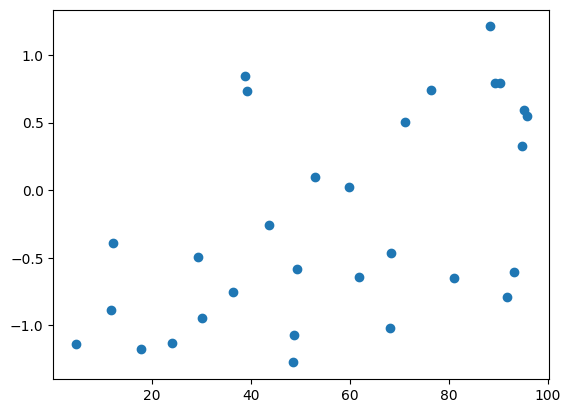

In [3]:
plt.plot(t,y,'o');

And this is one of the possible versions of the Fourier periodogram. This versions works for any input frequency, and it is not optimized for the Fourier frequency set.

*numpy.dot* implements the dot product for two arrays: https://numpy.org/doc/stable/reference/generated/numpy.dot.html

The *map()* function applies a given function to each item of an iterable (list, tuple etc.) and returns an iterator: https://www.programiz.com/python-programming/methods/built-in/map

In [4]:
def schuster_periodogram(t, mag, freq):
    t, mag, freq = map(np.asarray, (t, mag, freq))
    return abs(np.dot(mag, np.exp(-2j * np.pi * freq * t[:, None])) / np.sqrt(len(t))) ** 2

And, finally, we compute the LS periodogram as well as the A, B and $\tau$ functions:

/usr/local/lib/python3.10/dist-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:102: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))
<ipython-input-5-0b130e10b601>:6: RuntimeWarning: divide by zero encountered in divide
  tau = 1. / (4 * np.pi * freq) * np.arctan2(np.sin(4 * np.pi * freq * t[:, None]).sum(0),
<ipython-input-5-0b130e10b601>:6: RuntimeWarning: invalid value encountered in multiply
  tau = 1. / (4 * np.pi * freq) * np.arctan2(np.sin(4 * np.pi * freq * t[:, None]).sum(0),


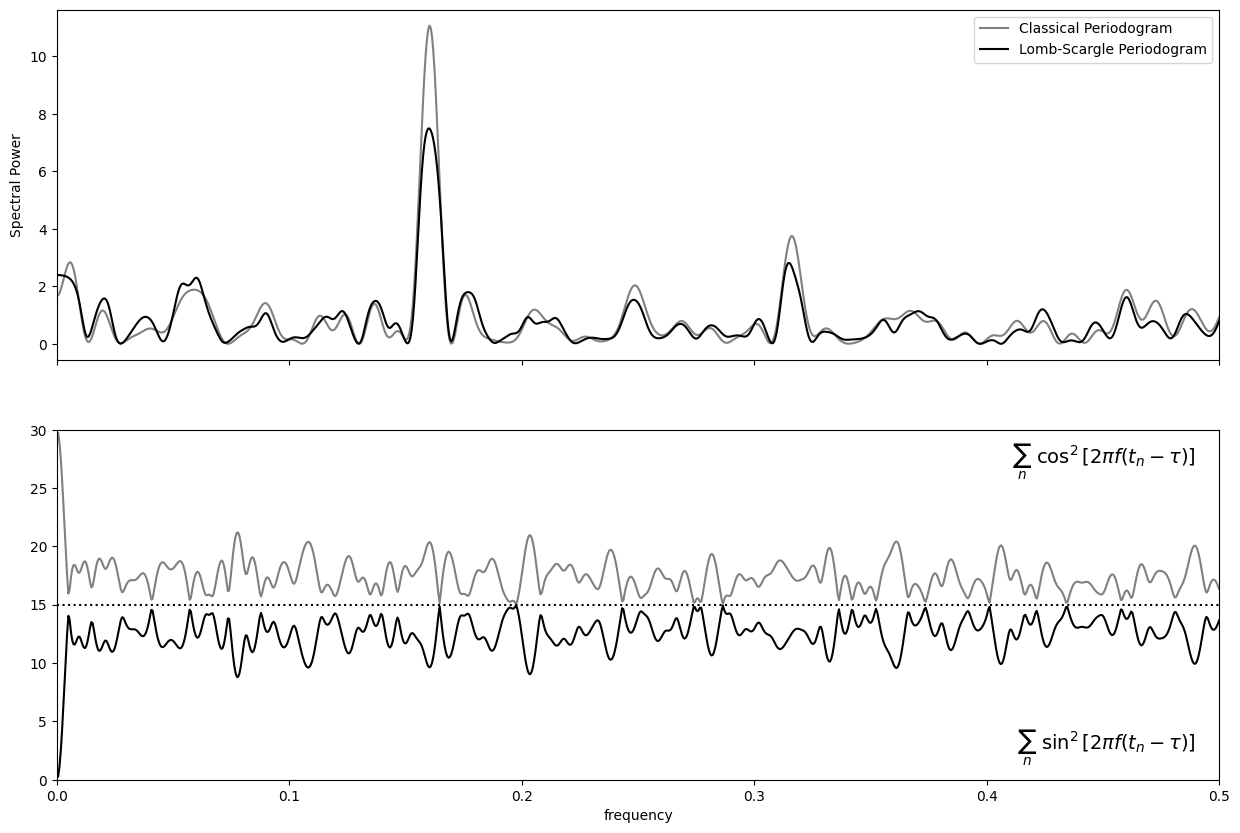

In [5]:
freq, p_ls = LombScargle(t, y).autopower(minimum_frequency=0,
                                         maximum_frequency=0.5,
                                         normalization='psd',
                                         samples_per_peak=20)
p_schuster = schuster_periodogram(t, y, freq)
tau = 1. / (4 * np.pi * freq) * np.arctan2(np.sin(4 * np.pi * freq * t[:, None]).sum(0),
                                           np.cos(4 * np.pi * freq * t[:, None]).sum(0))
sin_window = (np.sin(2 * np.pi * freq * (t[:, None] - tau)) ** 2).sum(0)
cos_window = (np.cos(2 * np.pi * freq * (t[:, None] - tau)) ** 2).sum(0)

fig, ax = plt.subplots(2, figsize=(15, 10), sharex=True)
ax[0].plot(freq, p_schuster, '-', color='gray', label='Classical Periodogram')
ax[0].plot(freq, p_ls, '-k', label='Lomb-Scargle Periodogram')
ax[0].legend();
ax[0].set(ylabel='Spectral Power')

ax[1].plot(freq, sin_window, '-', color='black')
ax[1].plot(freq, cos_window, '-', color='gray')
ax[1].axhline(len(t) / 2, linestyle=':', color='black')
ax[1].text(0.49, 29, r'$\sum_n\ \cos^2 [2\pi f (t_n-\tau)]$', ha='right', va='top', size=14)
ax[1].text(0.49, 1, r'$\sum_n\ \sin^2 [2\pi f (t_n-\tau)]$', ha='right', va='bottom', size=14)
ax[1].set(xlabel='frequency',
          xlim=(0, 0.5),
          ylim=(0, 30))

plt.show();